Dado o conjunto de dados de treinamento $X$, sendo  $X = \Big\{(x_1,y_1), (x_2,y_2), \ldots, (x_N,y_N)\Big\}$, onde $x_i \in \mathbb{R}_d, $ e $ y_i \in \{-1, +1\}, i=1,2,\ldots,N$.

Dado $\mathbf{x} = (x_1, \ldots, x_d)  \in \mathbb{R}_d$, consideraremos a coordenada artifical $x_0$ = 1, então $\tilde{\mathbf{x}} = (1, x_1, \ldots, x_d) \in \mathbb{R}_{1+d}$.

Assumindo um problema linearmente separável, ou seja, apenas uma reta (ou hiperplano) separa os exemplos em suas respectivas classes:

O algoritmo perceptron irá determina um vetor de pesos $\mathbf{w} \in \mathbb{R}_{1+d}$ tal que $\mathrm{sign}(\mathbf{w}^T \tilde{\mathbf{x}}_i) = y_i$, considerando a função de ativação sign (sinal), para todo

$$
sign(z) = \left\{\begin{array}{ll}+1, & \mbox{if $z \geq 0$,}\\ -1, & \mbox{if $z < 0$.}\\
\end{array}\right.
$$




## Dados de treinamento

- Considerando $\mathbb{R}^2$ como sendo espaço real bidimensional que representa o plano cartesiano, onde cada ponto é descrito por dois números reais.
- Nosso conjunto de dados contém $N$ pontos, definidos entre $[-1,2]\times [-1,2] \subseteq \mathbb{R}^2$.
- Definimos os pontos $x = (x_1,x_2)$ como $f(x) \geq 0$ sendo os exemplos positivos, e $f(x) < 0$ como sendo os negativos (ou seja, as classes dos pontos são determinadas pelo sinal de $f$ nos respectivos pontos.
- Para ilustrar, traçaremos um gráfico com todos os exemplos, onde os <font color="blue">positivos</font> são representados em azul, e os negativos <font color="red">negativos</font> em vermelho, assim como a fronteira de decisão (decision boundary)

Shape of array X:  (6, 2)
Number of examples:  6
Shape of array Xe:  (6, 3)
Shape of array w_target:  (3, 1)
Target weight array: 
 [[ 0.5]
 [-1. ]
 [ 1. ]]
Shape of array y:  (6, 1)
[-1.         -0.93877551 -0.87755102 -0.81632653 -0.75510204 -0.69387755
 -0.63265306 -0.57142857 -0.51020408 -0.44897959 -0.3877551  -0.32653061
 -0.26530612 -0.20408163 -0.14285714 -0.08163265 -0.02040816  0.04081633
  0.10204082  0.16326531  0.2244898   0.28571429  0.34693878  0.40816327
  0.46938776  0.53061224  0.59183673  0.65306122  0.71428571  0.7755102
  0.83673469  0.89795918  0.95918367  1.02040816  1.08163265  1.14285714
  1.20408163  1.26530612  1.32653061  1.3877551   1.44897959  1.51020408
  1.57142857  1.63265306  1.69387755  1.75510204  1.81632653  1.87755102
  1.93877551  2.        ]
color:  ['red', 'blue', 'blue', 'red', 'blue', 'blue']


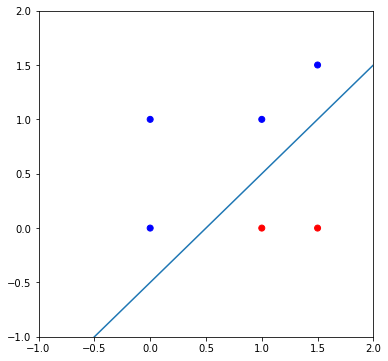

In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


xmin = ymin = -1
xmax = ymax = 2

# cria um array distribuido com N = 6 e d = 2.
X = np.asarray([[1.5,-0],[0,0],[0,1],[1,0],[1,1],[1.5,1.5]]) 
#X = np.random.uniform(xmin, xmax, size=(5, 2)) # Cria um array com dados aleatórios com N = 6 e d = 2.
print("Shape of array X: ", X.shape)

N = X.shape[0]
print("Number of examples: ", N)

# Adiciona uma coluna a esquerda com 1s (coordenada artificial), considerando a quantidade de exemplos.
# Com isso, deixamos o X estendido com o mesmo numero de elementos do array de peso (començando do w_0).
def add_column_of_ones(X):
    return np.hstack(( np.ones((X.shape[0],1)), X ) )
Xe = add_column_of_ones(X)
print("Shape of array Xe: ", Xe.shape)

# define o array de pesos alvo para o exemplo
w_target = np.asarray([[0.5],[-1], [1]])

print("Shape of array w_target: ", w_target.shape)
print("Target weight array: \n", w_target)

# define y (class) values, based on the line defined by the target weight vector
y = np.sign(np.dot(Xe, w_target))
print("Shape of array y: ", y.shape)

# Plotting ...

# plot the line
a = -w_target[1] / w_target[2] # slope  -- we will have trouble if w_target[2]=0 ...
b = -w_target[0] / w_target[2] # intercept
x_l = np.linspace(xmin, xmax, 50)
print(x_l)
y_l = a*x_l + b

plt.figure(figsize=(6,6))
plt.plot(x_l, y_l);
axes = plt.gca()
axes.set_xlim([xmin,xmax])
axes.set_ylim([xmin,ymax])

# Determine the colors of each of the examples
colors = ["blue" if y[i]==1 else "red" for i in range(N)]
print("color: ", colors)

# plot the examples
plt.scatter(X[:,0],X[:,1],c=colors)

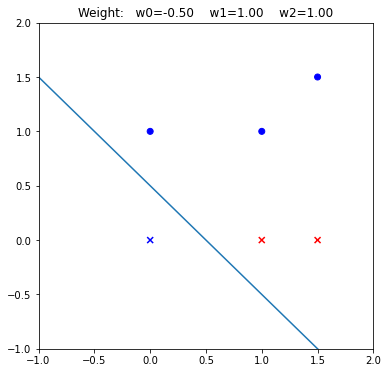

In [50]:
def plot_state(Xe,w,xmin=-1,xmax=2,ymin=-1,ymax=2):
    # compute yhat - prediction
    yhat = np.sign(np.dot(Xe,w))

    correct = np.where(y == yhat)[0]
    misclassified = np.where(y != yhat)[0]

    colors_o = ["blue" if y[i]==1 else "red" for i in correct]
    colors_x = ["blue" if y[i]==1 else "red" for i in misclassified]

    # plotting
    a = -w[1] / w[2] # slope
    b = -w[0] / w[2] # intercept
    x_l = np.linspace(-1, 2, 50)
    y_l = a*x_l + b

    plt.figure(figsize=(6,6))
    plt.plot(x_l, y_l);
    axes = plt.gca()
    axes.set_xlim([xmin,xmax])
    axes.set_ylim([xmin,ymax])
    plt.title("Weight:   w0=%.2f    w1=%.2f    w2=%.2f" %(w[0],w[1],w[2]))
    plt.scatter(X[correct,0],X[correct,1],c=colors_o, marker='o');
    plt.scatter(X[misclassified,0],X[misclassified,1],c=colors_x, marker='x');

    
# Starting weight vector <---- change as you wish (as long as w0[2] != 0)
np.random.seed(1)
w_target = np.random.uniform(-1, 1, size=(3, 1))
   
plot_state(Xe,w0)

Initial weight vector=
 [[-0.5]
 [ 1. ]
 [ 1. ]]


C:\Users\oalbu\AppData\Local\Temp\ipykernel_1260\4271521142.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6,6))



Final weight vector=
 [[ 0.5]
 [-1. ]
 [ 2. ]]


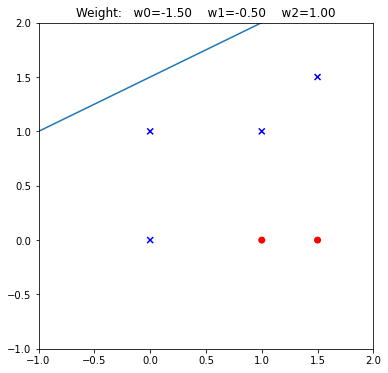

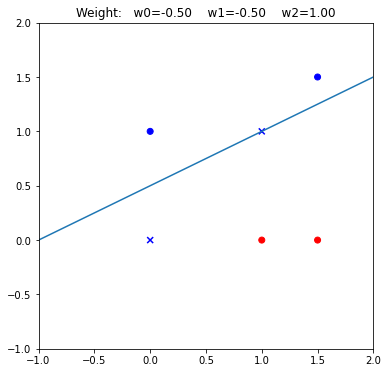

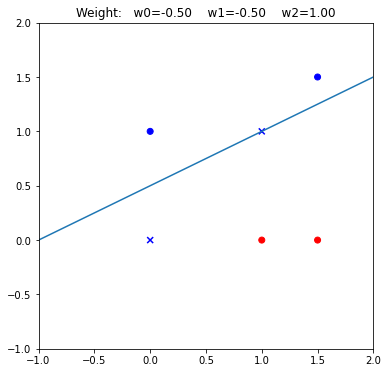

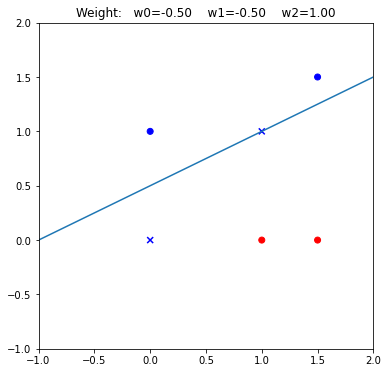

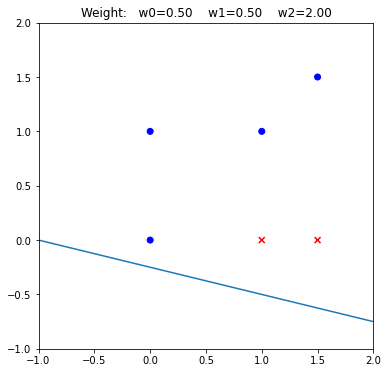

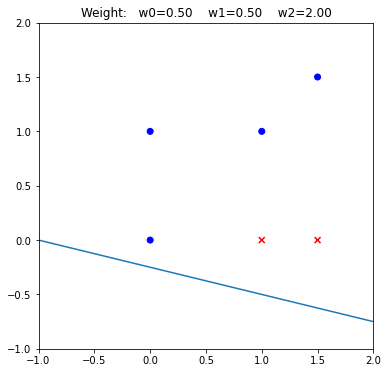

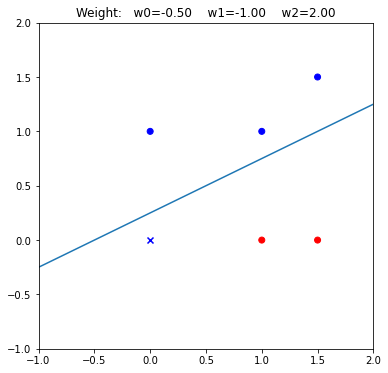

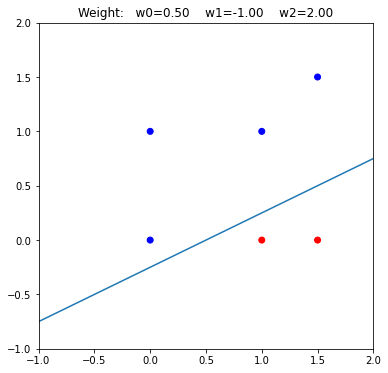

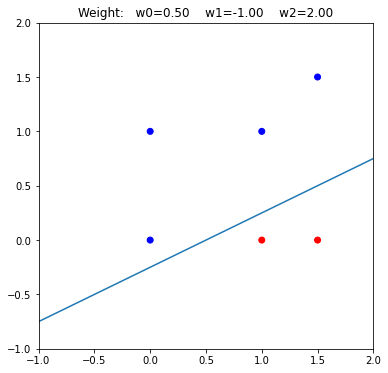

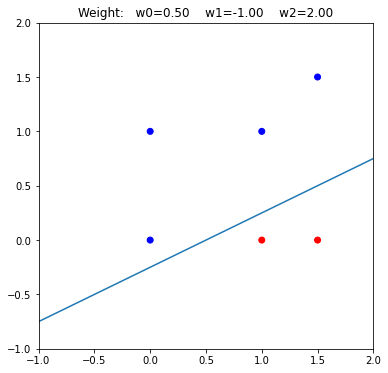

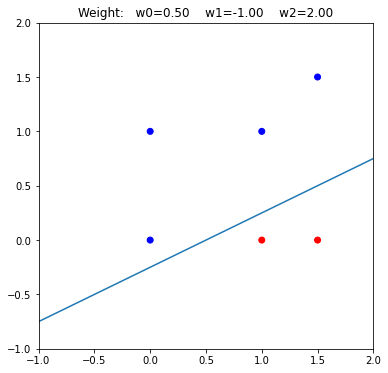

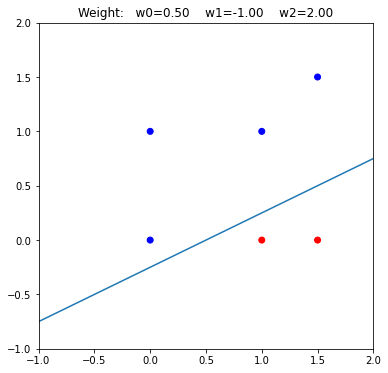

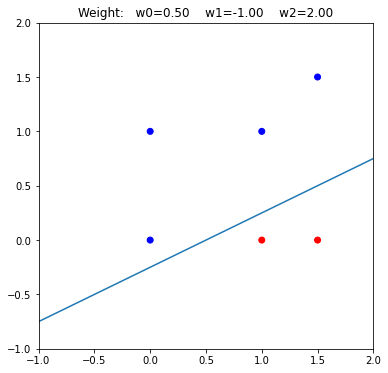

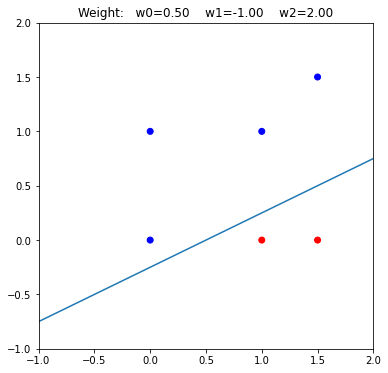

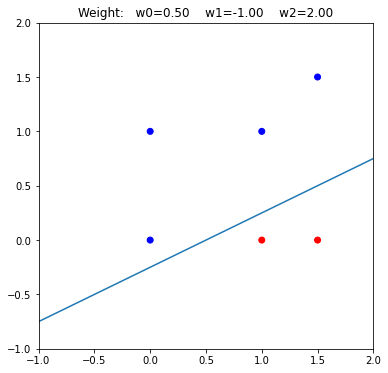

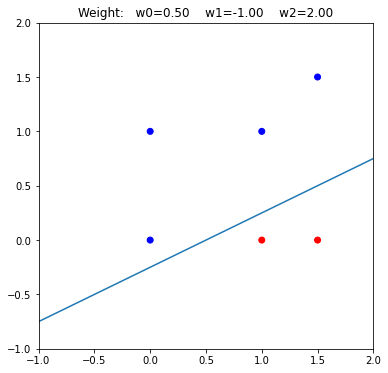

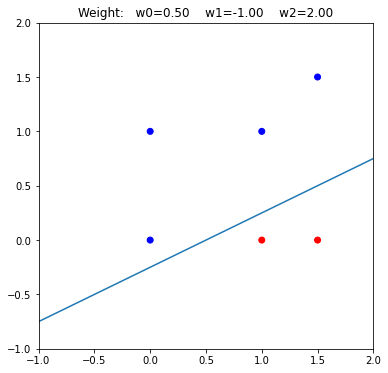

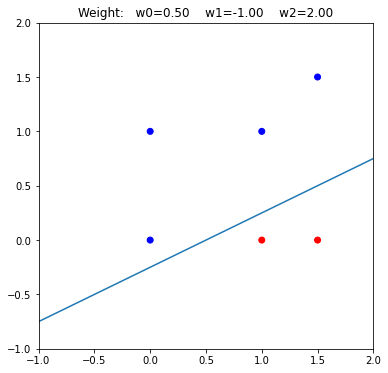

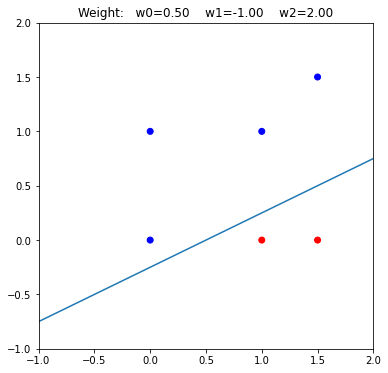

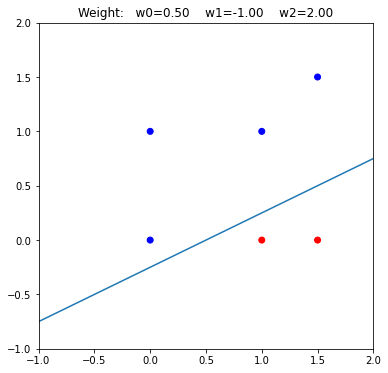

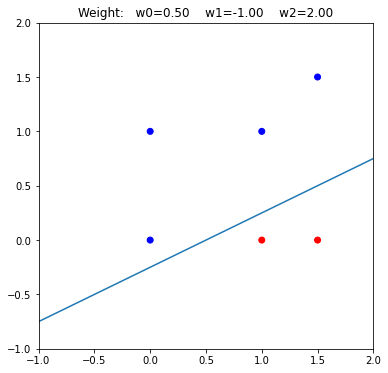

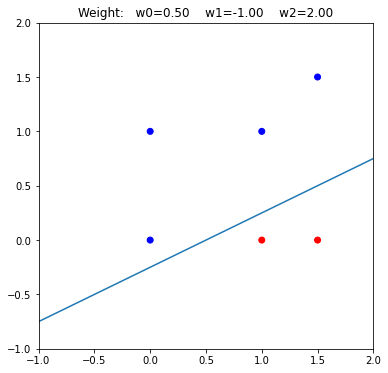

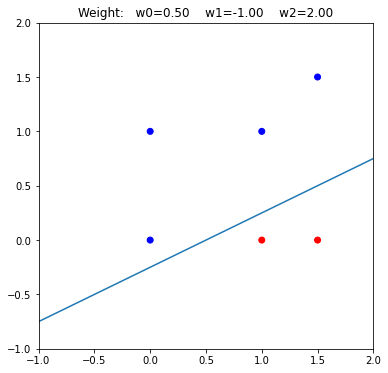

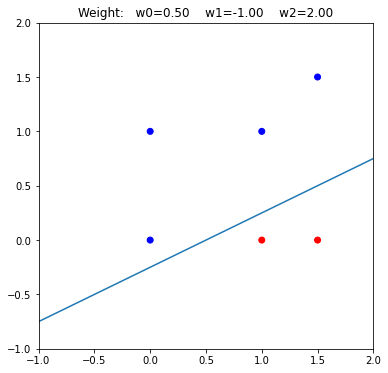

In [51]:
def perceptron(Xe,y,w0,plot=False):
    """
    Parameters:
       Xe   : ndarray (N,d+1) - it already has the 1's in column 0
       y    : ndarray (N,1)
       w0   : ndarray (d+1,1) - the initial weight vector
       plot : If True, plot the state at the beginning of each iteration
       
    Returns:
       w : ndarray (d+1,1) - the final weight vector
    """
    
    # START OF YOUR CODE:
    epochs = 4
    for epoch in range(epochs):
        for i, xi in enumerate(Xe):
            yhat = np.sign(np.dot(w0.T, xi))
            if yhat != y[i]:
                w0[0] = w0[0] + y[i] * xi[0]
                w0[1] = w0[1] + y[i] * xi[1]
                w0[2] = w0[2] + y[i] * xi[2]
            plot_state(Xe,w0)
    print("\nFinal weight vector=\n", w0)
    w = w0
    # END YOUR CODE
    return w


# Test your function for w0, X and y as defined above
w0 = np.asarray([[-0.5], [1] , [1]]) # <---- you can change it (as long as w0[2] != 0)
print("Initial weight vector=\n", w0)

w = perceptron(Xe,y,w0,plot=True)


# Print the final weight vector and plot the final graph using the function plot_state.
# START OF YOUR CODE:
# END YOUR CODE